<a href="https://colab.research.google.com/github/Abdullah042973/AI-in-medical-domain/blob/main/better_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
 
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
 
 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/covid xray and ct scan/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6310 images belonging to 7 classes.


In [ ]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/covid xray and ct scan/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 975 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
def createmodel():
  # Part 2 - Building the CNN
  # Initialising the CNN
  cnn = tf.keras.models.Sequential()
  # Step 1 - Convolution
  cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
  # Step 2 - Pooling
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
  # Adding a second convolutional layer
  cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
  # Step 3 - Flattening
  cnn.add(tf.keras.layers.Flatten())
  # Step 4 - Full Connection
  cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
  # Step 5 - Output Layer
  #cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  cnn.add(Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='softmax'))
  cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return cnn
 
model = createmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 9

In [ ]:
model = createmodel()
r=model.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
198/198 [==============================] - 5250s 27s/step - loss: 1.1634 - accuracy: 0.5355 - val_loss: 0.5754 - val_accuracy: 0.8072
Epoch 2/20
198/198 [==============================] - 138s 698ms/step - loss: 0.6907 - accuracy: 0.7347 - val_loss: 0.7293 - val_accuracy: 0.7210
Epoch 3/20
198/198 [==============================] - 123s 620ms/step - loss: 0.6180 - accuracy: 0.7521 - val_loss: 0.4521 - val_accuracy: 0.8687
Epoch 4/20
198/198 [==============================] - 123s 621ms/step - loss: 0.5657 - accuracy: 0.7757 - val_loss: 0.4815 - val_accuracy: 0.8595
Epoch 5/20
198/198 [==============================] - 123s 620ms/step - loss: 0.5510 - accuracy: 0.7836 - val_loss: 0.5005 - val_accuracy: 0.8564
Epoch 6/20
198/198 [==============================] - 123s 621ms/step - loss: 0.5391 - accuracy: 0.7825 - val_loss: 0.5030 - val_accuracy: 0.8554
Epoch 7/20
198/198 [==============================] - 131s 662ms/step - loss: 0.5287 - accuracy: 0.7886 - val_loss: 0.4352 - 

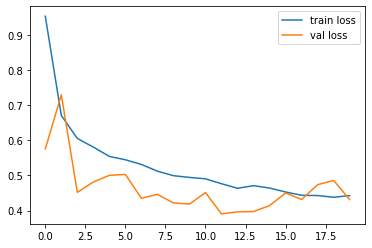

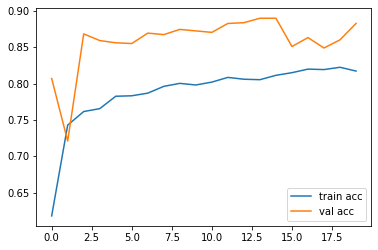

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
 
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/covid xray and ct scan/test/NORMAL/NORMAL2-IM-0007-0001.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[5.1575322e-03, 1.3459766e-01, 7.4950856e-01, 3.6098141e-02,
        7.2986640e-02, 5.2756164e-04, 1.1237895e-03]], dtype=float32)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/covid xray and ct scan/train/COVID 19/COVID-19 (116).png', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[3.63362597e-06, 9.98988211e-01, 1.03035774e-07, 2.56560099e-07,
        1.44550881e-07, 9.99519369e-04, 8.08880577e-06]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/X-ray and CT scan ( binary classification )/TESTING/non-covid/NORMAL2-IM-0007-0001.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[5.1575322e-03, 1.3459766e-01, 7.4950856e-01, 3.6098141e-02,
        7.2986640e-02, 5.2756164e-04, 1.1237895e-03]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
model.save('better_cnn_model.model')

INFO:tensorflow:Assets written to: better_cnn_model.model/assets


In [ ]:
from tensorflow.keras.models import load_model
model.save('better_cnn_model.h5')

In [ ]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi
!nvidia-smi -L

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Thu Feb 18 09:30:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+